In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('KDDTrain+.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [24]:
coll=df[['protocol_type','land','urgent','count','srv_count','dst_host_count','dst_host_srv_count','class']]

In [25]:
coll.head()

,protocol_type,land,urgent,count,srv_count,dst_host_count,dst_host_srv_count,class
0,tcp,0,0,2,2,150,25,normal
1,udp,0,0,13,1,255,1,normal
2,tcp,0,0,123,6,255,26,anomaly
3,tcp,0,0,5,5,30,255,normal
4,tcp,0,0,30,32,255,255,normal


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
coll['class'] = le.fit_transform(coll['class'])
coll['protocol_type']=le.fit_transform(coll['protocol_type'])

C:\Users\Vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
x_train = coll.iloc[:,:-1].values
y_train = coll.iloc[:,-1].values

In [28]:
coll.head()

,protocol_type,land,urgent,count,srv_count,dst_host_count,dst_host_srv_count,class
0,1,0,0,2,2,150,25,1
1,2,0,0,13,1,255,1,1
2,1,0,0,123,6,255,26,0
3,1,0,0,5,5,30,255,1
4,1,0,0,30,32,255,255,1


In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,random_state=0)
# max_depth=5 = 95%
#clf = RandomForestClassifier(random_state=0) -> 99.11% same as decision tree
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [30]:
dftest=pd.read_csv('KDDTest+.csv')
dftest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [31]:
colltest=dftest[['protocol_type','land','urgent','count','srv_count','dst_host_count','dst_host_srv_count','class']]



In [32]:
colltest.head()

,protocol_type,land,urgent,count,srv_count,dst_host_count,dst_host_srv_count,class
0,tcp,0,0,229,10,255,10,anomaly
1,tcp,0,0,136,1,255,1,anomaly
2,tcp,0,0,1,1,134,86,normal
3,icmp,0,0,1,65,3,57,anomaly
4,tcp,0,0,1,8,29,86,anomaly


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colltest['class'] = le.fit_transform(colltest['class'])
colltest['protocol_type']=le.fit_transform(colltest['protocol_type'])

C:\Users\Vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
x_test = colltest.iloc[:,:-1].values
y_test = colltest.iloc[:,-1].values

In [35]:
y_pred=clf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_Logistic = clf.score(x_test,y_test)
accuracy_Logistic

0.7339868701206529

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mean absolute error",mae)
rmse=np.sqrt(mse)
print("root mean square error",rmse)

mean absolute error 0.26601312987934705
root mean square error 0.5157646070440924


In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[7174 5659]
 [ 338 9373]]


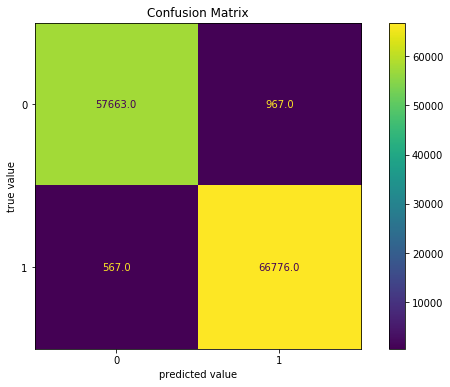

In [39]:
from sklearn.metrics import plot_confusion_matrix

matrix=plot_confusion_matrix(clf,x_train,y_train,values_format = '.1f')
type(matrix)
matrix.ax_.set_title("Confusion Matrix")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [40]:
from sklearn.metrics import recall_score,precision_score,f1_score
rec=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("recall -",rec)
print("precision -",prec)
print("f1_score -",f1)

recall - 0.965194109772423
precision - 0.6235364555614689
f1_score - 0.7576284201592369
